In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

In [2]:
# For iPlot graphs in Google Colab

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True) # For Notebooks
cf.go_offline() # For offline use

# **1. Logistic Regression Classification**

In [3]:
dataset = pd.read_csv("../input/classificationdata/Social_Network_Ads.csv")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


[[65  3]
 [ 8 24]]


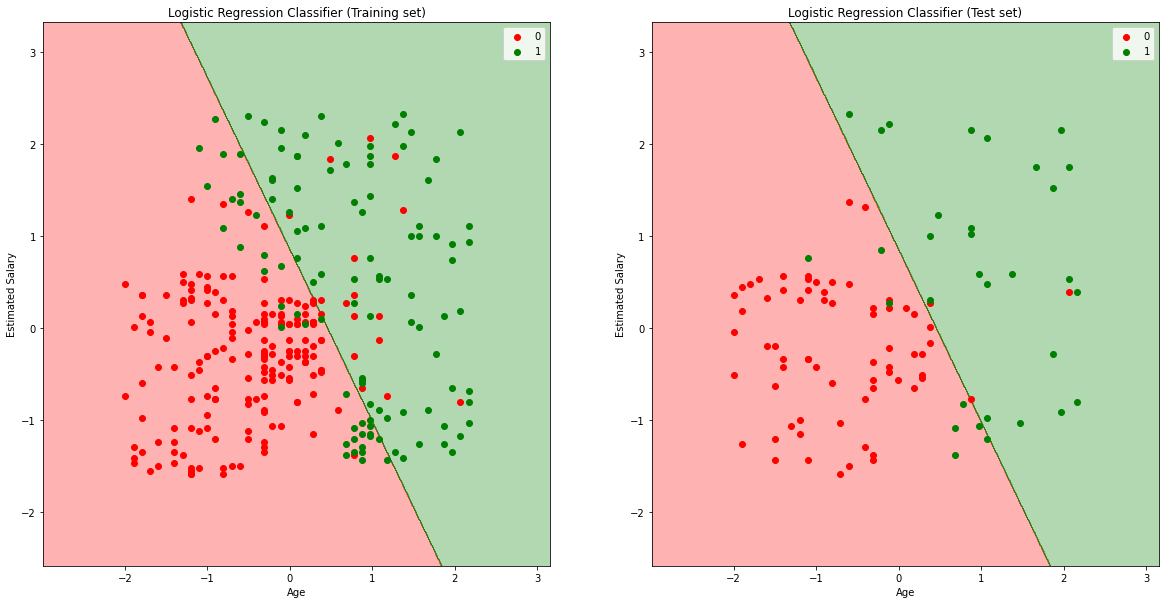

In [6]:
X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(20,10))
# X1=age, X2=estimated salary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax1.set_title('Logistic Regression Classifier (Training set)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax2.set_title('Logistic Regression Classifier (Test set)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')
ax2.legend()

plt.show()

* **Another method of model performance Evaluation - ROC Curve**

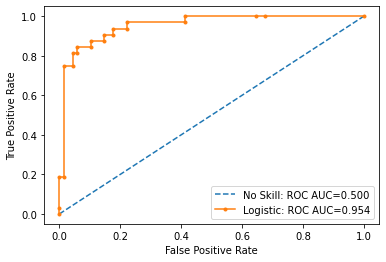

In [7]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

lr_probs = classifier.predict_proba(X_test)
#max(set(list(y_test)), key=list(y_test).count) => max occuring element
ns_probs = [max(set(list(y_test)), key=list(y_test).count) for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs[:,1])
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs[:,1])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic: ROC AUC=%.3f' % (lr_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# **2. K-NN classifier**

[[64  4]
 [ 3 29]]


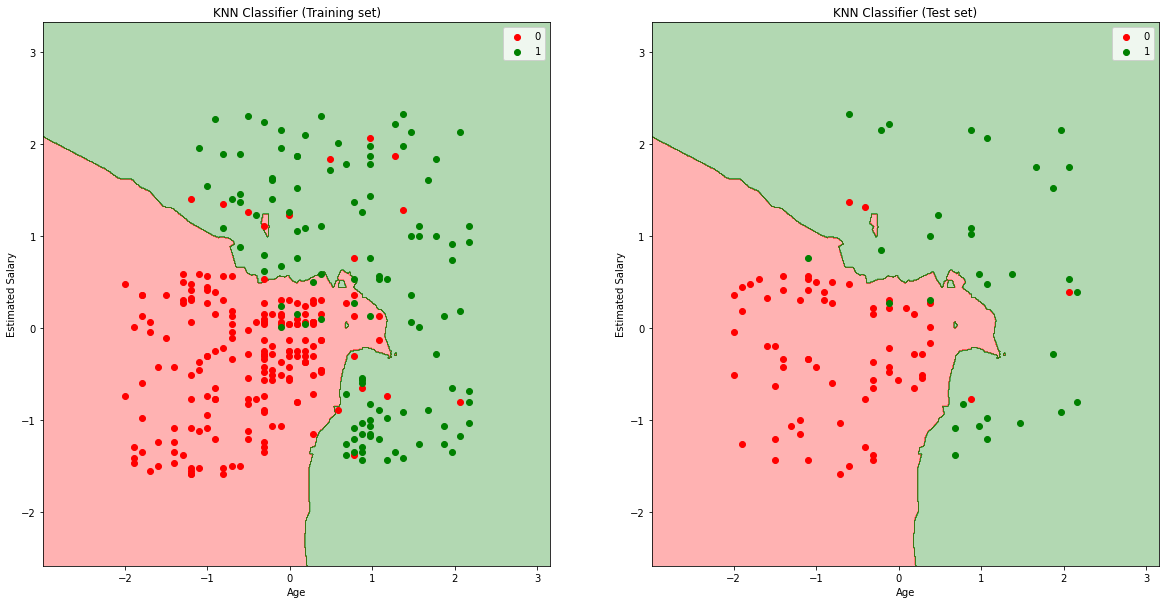

In [8]:
dataset = pd.read_csv("../input/classificationdata/Social_Network_Ads.csv")
dataset.head()

X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(20,10))
# X1=age, X2=estimated salary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax1.set_title('KNN Classifier (Training set)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax2.set_title('KNN Classifier (Test set)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')
ax2.legend()

plt.show()

# **3. Support Vector Machines**

[[64  4]
 [ 3 29]]


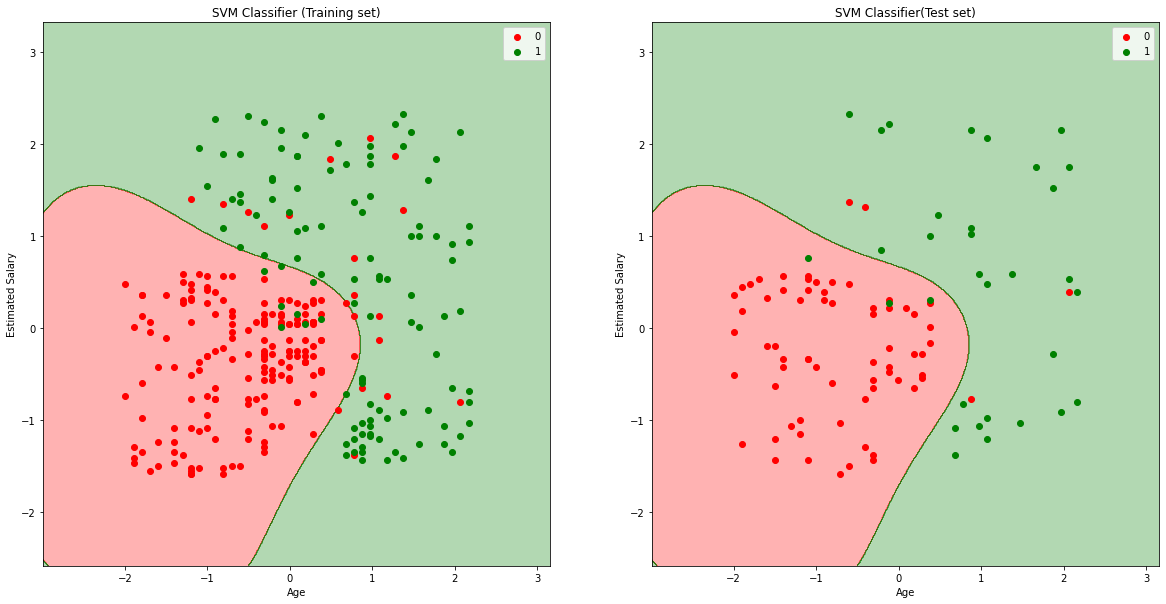

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

dataset = pd.read_csv("../input/classificationdata/Social_Network_Ads.csv")
dataset.head()

X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(20,10))
# X1=age, X2=estimated salary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax1.set_title('SVM Classifier (Training set)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax2.set_title('SVM Classifier(Test set)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')
ax2.legend()

plt.show()

# **4. Naive Bayes**

[[65  3]
 [ 7 25]]


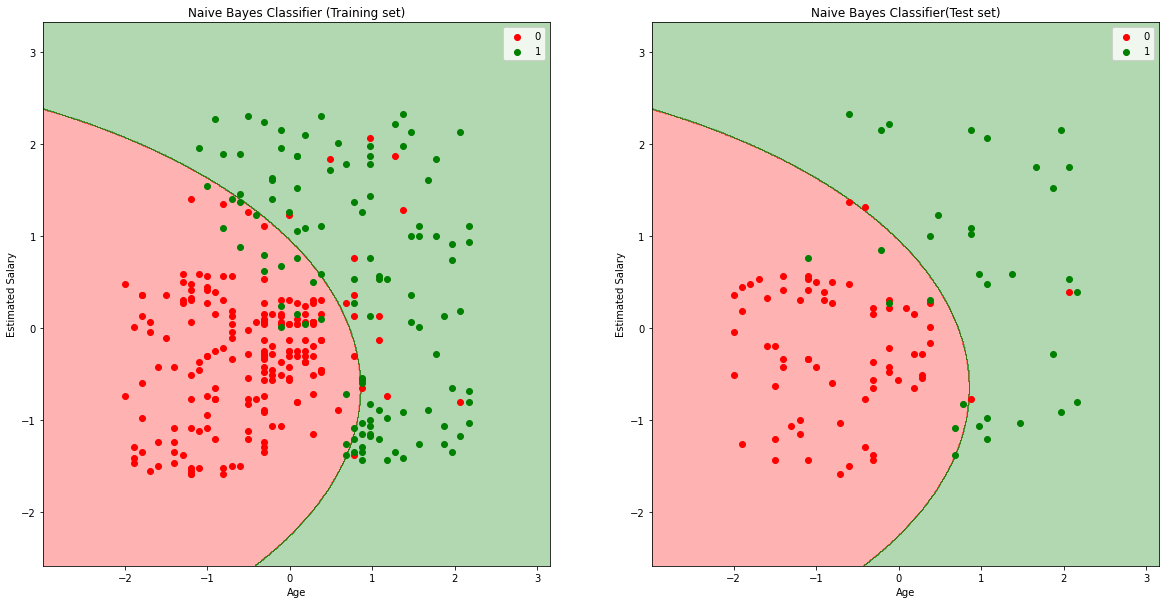

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

dataset = pd.read_csv("../input/classificationdata/Social_Network_Ads.csv")
dataset.head()

X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(20,10))
# X1=age, X2=estimated salary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax1.set_title('Naive Bayes Classifier (Training set)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax2.set_title('Naive Bayes Classifier(Test set)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')
ax2.legend()

plt.show()

# **5. Decision Tree Classifier**

[[62  6]
 [ 3 29]]


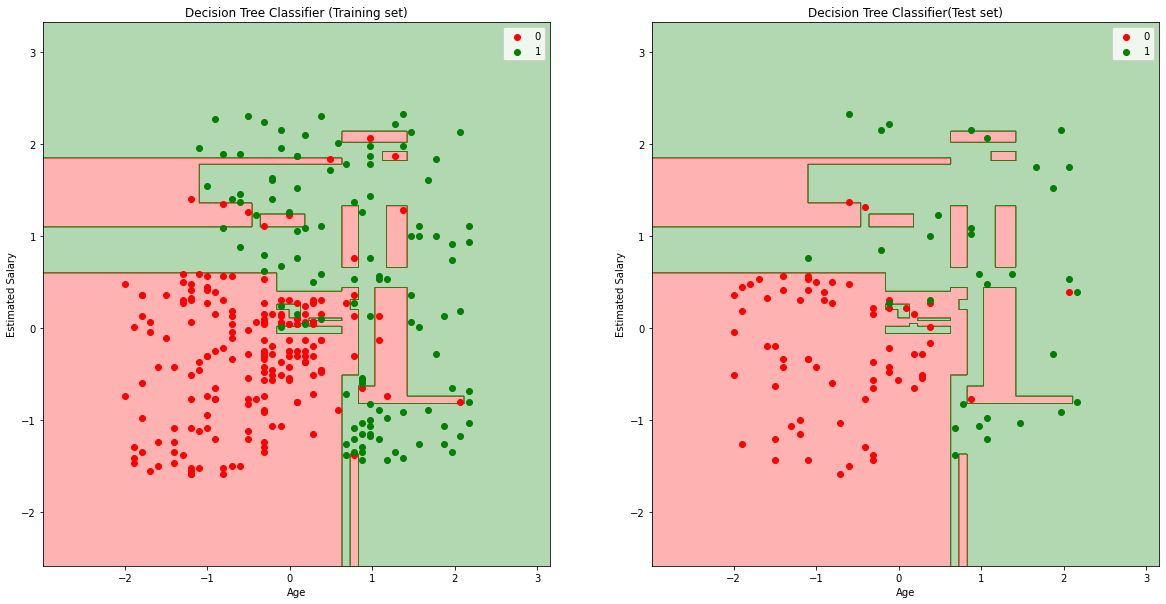

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

dataset = pd.read_csv("../input/classificationdata/Social_Network_Ads.csv")
dataset.head()

X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(20,10))
# X1=age, X2=estimated salary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax1.set_title('Decision Tree Classifier (Training set)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax2.set_title('Decision Tree Classifier(Test set)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')
ax2.legend()

plt.show()

# **6. Random Forests Classification**

[[63  5]
 [ 4 28]]


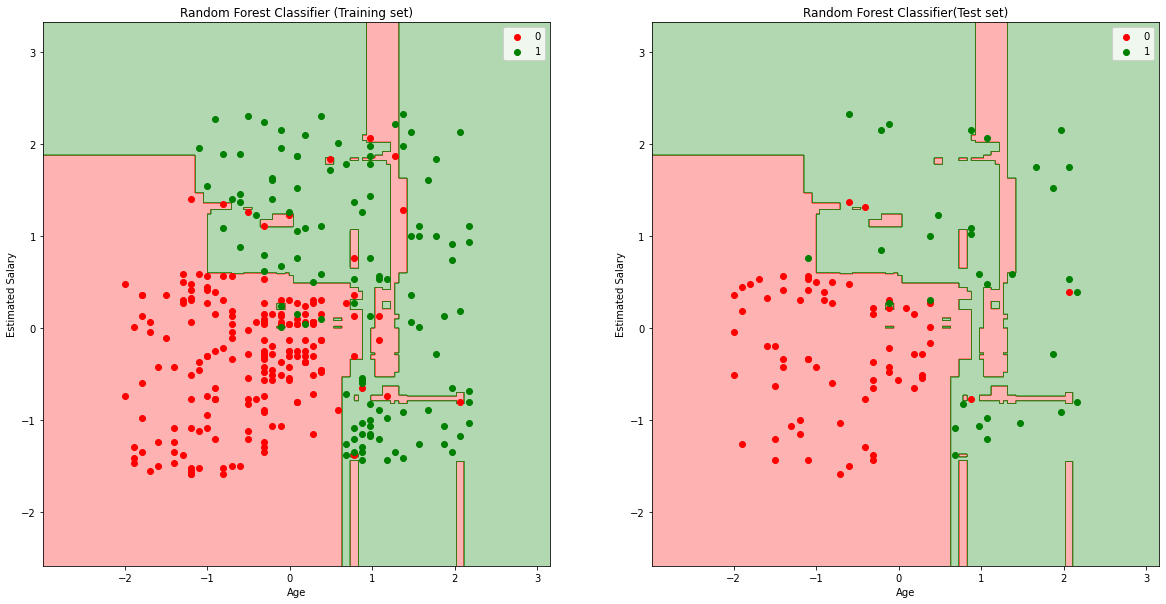

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

dataset = pd.read_csv("../input/classificationdata/Social_Network_Ads.csv")
dataset.head()

X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(20,10))
# X1=age, X2=estimated salary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax1.set_title('Random Forest Classifier (Training set)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax2.set_title('Random Forest Classifier(Test set)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')
ax2.legend()

plt.show()

# **7. Linear Discriminant Analysis Classification**

[[65  3]
 [ 7 25]]


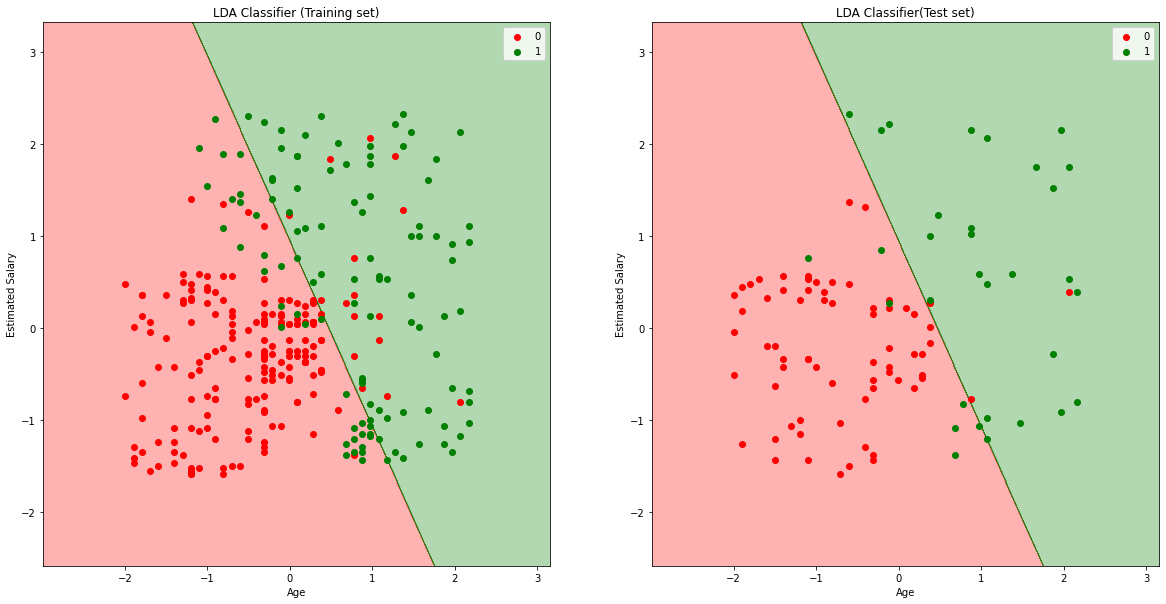

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

dataset = pd.read_csv("../input/classificationdata/Social_Network_Ads.csv")
dataset.head()

X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LinearDiscriminantAnalysis()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(20,10))
# X1=age, X2=estimated salary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax1.set_title('LDA Classifier (Training set)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax2.set_title('LDA Classifier(Test set)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')
ax2.legend()

plt.show()

# **8. Quadratic Discriminant Analysis Classification**

[[64  4]
 [ 4 28]]


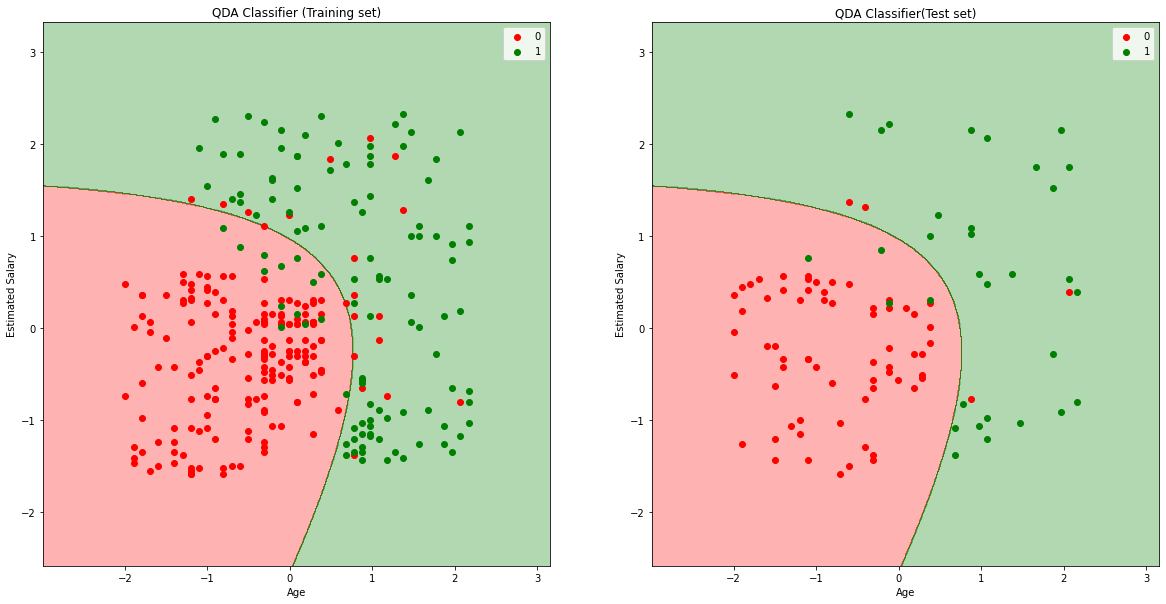

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

dataset = pd.read_csv("../input/classificationdata/Social_Network_Ads.csv")
dataset.head()

X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(20,10))
# X1=age, X2=estimated salary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax1.set_title('QDA Classifier (Training set)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax2.set_title('QDA Classifier(Test set)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')
ax2.legend()

plt.show()